In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
import numpy as np

# read data

In [45]:
df = pd.read_excel("churn_dataset.xlsx")
df

,Age,Tenure,Sex,Churn
0,56,8,Male,No
1,46,63,Female,No
2,32,11,Female,No
3,60,8,Male,No
4,25,35,Male,No
...,...,...,...,...
95,24,38,Female,No
96,26,24,Male,No
97,41,69,Female,Yes
98,18,70,Male,No


# preprocessing data

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     100 non-null    int64 
 1   Tenure  100 non-null    int64 
 2   Sex     100 non-null    object
 3   Churn   100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


In [47]:
df.describe()

,Age,Tenure
count,100.00000,100.00000
mean,40.88000,35.03000
std,13.99082,21.65732
min,18.00000,1.00000
25%,30.50000,14.75000
50%,41.00000,35.00000
75%,53.25000,54.25000
max,64.00000,71.00000


In [48]:
df["Sex"] = df["Sex"].map({"Male":1 , "Female":0})

In [49]:
df["Churn"]=df["Churn"].map({"Yes":1,"No":0})

In [50]:
df

,Age,Tenure,Sex,Churn
0,56,8,1,0
1,46,63,0,0
2,32,11,0,0
3,60,8,1,0
4,25,35,1,0
...,...,...,...,...
95,24,38,0,0
96,26,24,1,0
97,41,69,0,1
98,18,70,1,0


# train test split

In [51]:
x=df.drop("Churn" , axis=1)
y=df["Churn"]
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2, random_state=42)

# use gaussianNB

In [52]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [53]:
y_predict = model.predict(x_test)

In [58]:
model.predict_proba(x_train)

array([[0.68684427, 0.31315573],
       [0.7005639 , 0.2994361 ],
       [0.69771016, 0.30228984],
       [0.77124461, 0.22875539],
       [0.64633798, 0.35366202],
       [0.77283927, 0.22716073],
       [0.69843583, 0.30156417],
       [0.76752444, 0.23247556],
       [0.75614492, 0.24385508],
       [0.7451083 , 0.2548917 ],
       [0.75679906, 0.24320094],
       [0.7741337 , 0.2258663 ],
       [0.8129357 , 0.1870643 ],
       [0.78688118, 0.21311882],
       [0.72215079, 0.27784921],
       [0.6834469 , 0.3165531 ],
       [0.67135136, 0.32864864],
       [0.70722319, 0.29277681],
       [0.75840823, 0.24159177],
       [0.73084234, 0.26915766],
       [0.79355945, 0.20644055],
       [0.7193498 , 0.2806502 ],
       [0.80005759, 0.19994241],
       [0.6932236 , 0.3067764 ],
       [0.74195892, 0.25804108],
       [0.69871572, 0.30128428],
       [0.81933184, 0.18066816],
       [0.80170252, 0.19829748],
       [0.82716015, 0.17283985],
       [0.70971724, 0.29028276],
       [0.

# accuracy

In [54]:
accuracy_score(y_predict , y_test)

0.8

# confusion matrix

In [55]:
cm = confusion_matrix(y_test,y_predict)

Text(0.5, 1.0, 'confusion_matrix')

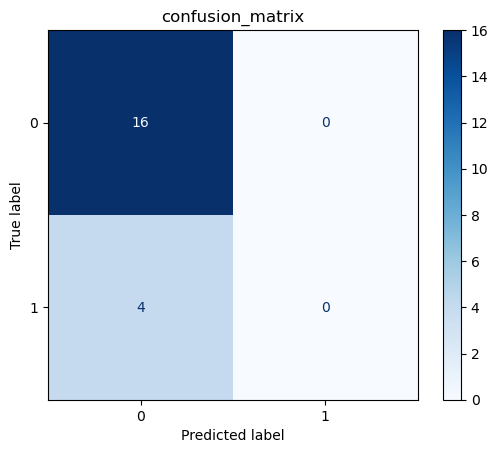

In [56]:
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot(cmap=plt.cm.Blues)
plt.title("confusion_matrix")

# extract model

In [57]:
joblib.dump(model,"task1_model.pkl")

['task1_model.pkl']